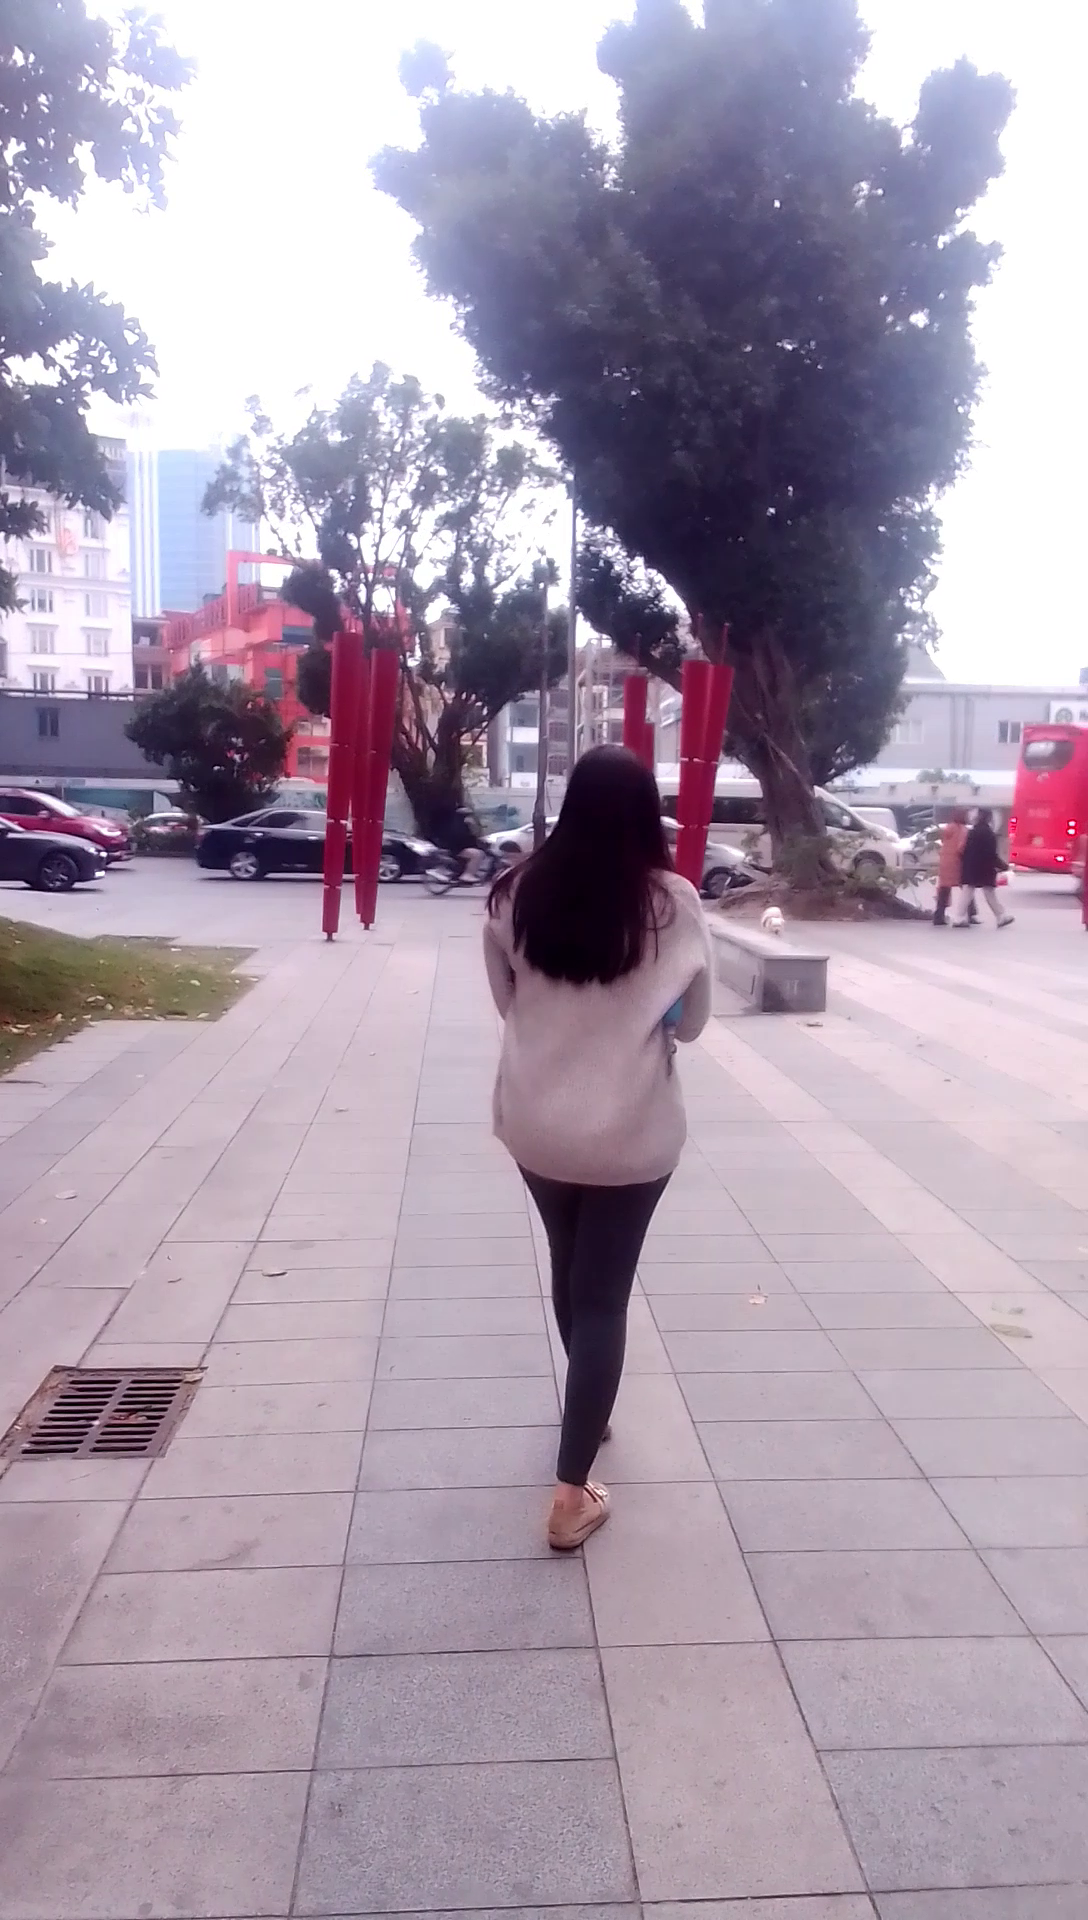

In [1]:
from body_matrix import load
from body_matrix import infer
from body_matrix import process
from body_matrix import measure

video, frames_counts, fps, sample_frame = load.video(
    "/Users/troydo42/Desktop/Test_Vids/m1_metropolis.mp4", 
    -90, 
    1
)
sample_frame

In [2]:
keypoints_model, keypoints_transform = load.keypoints_model("cpu")
selected_box, keypoints = infer.detect_main_target(
	sample_frame, "cpu", 0.8, keypoints_model, keypoints_transform
)

Found  3  person in the frame
Distances:  [48.711151123046875, 442.2552185058594, 407.5276794433594]
Areas:  [208635.8990510516, 6987.547137457877, 4697.784152615815]
FOCUSES:  [4283.1239714295925, 15.799807091174664, 11.527521661921227]
Select keypoint index 0


In [3]:
segment_model, segment_transform = load.segment_model("cpu")
mask, mask_image, bool_mask = infer.segment_selected_target(
	sample_frame, "cpu", selected_box, 0.99, segment_model, segment_transform
)

Found  5  person in the frame
[480.6763916015625, 735.0421752929688, 718.5543212890625, 1553.199951171875]
[465.52374267578125, 742.7734985351562, 719.8985595703125, 1562.96435546875]
[194.309326171875, 807.075927734375, 423.5586853027344, 880.8706665039062]
[465.52374267578125, 742.7734985351562, 719.8985595703125, 1562.96435546875]
[931.2000732421875, 807.9514770507812, 972.4813232421875, 926.6357421875]
[465.52374267578125, 742.7734985351562, 719.8985595703125, 1562.96435546875]
[964.2484741210938, 807.9756469726562, 1016.8197021484375, 928.5598754882812]
[465.52374267578125, 742.7734985351562, 719.8985595703125, 1562.96435546875]
[1008.5322265625, 721.5297241210938, 1086.254638671875, 874.3942260742188]
[465.52374267578125, 742.7734985351562, 719.8985595703125, 1562.96435546875]
[11.144199013938977, 419.45914986322583, 458.8325331886277, 489.14303917271263, 576.7971234452508]
11.144199013938977 0


In [4]:
selected_kps = process.keypoints_filter(
	['left_ear','right_ear'], 
	keypoints
)

In [5]:
segment_contours = process.segmentation_contour(
    sample_frame, 
    bool_mask
)

In [6]:
top_head = process.find_tophead_point(
    selected_kps['left_ear'],
    selected_kps['right_ear'],
    segment_contours
)

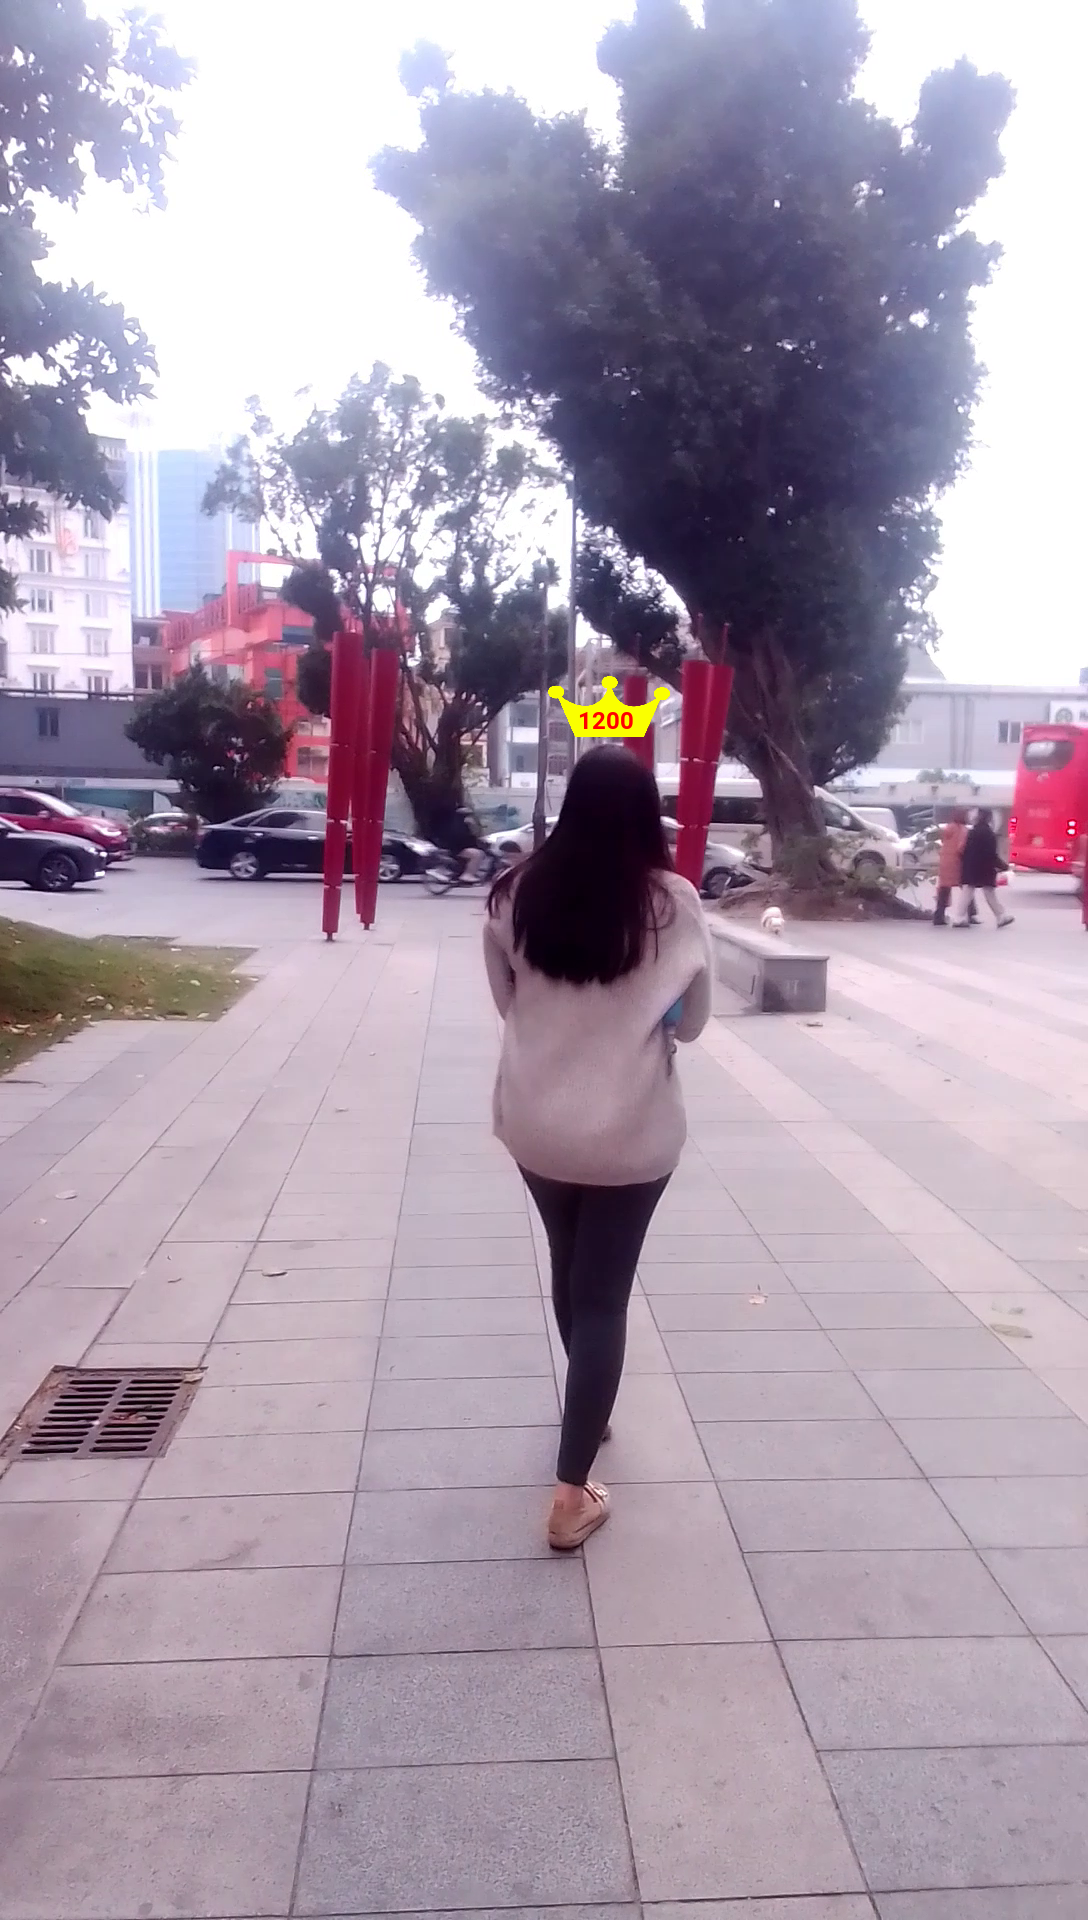

In [10]:
from body_matrix import draw

crowned = draw.add_crown(
    score=1200, 
    le=selected_kps['left_ear'], 
    re=selected_kps['right_ear'], 
    top_head=top_head, 
    frame=sample_frame,
    crown_image="./assets/crown.png",
    font_file="/content/drive/MyDrive/Body_Matrix/Roboto-Bold.ttf", 
)
crowned